In [1]:
%%capture
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

In [2]:
import os
#os.chdir('../src')
os.chdir('/content/drive/MyDrive/Melanoma Detection/src')

In [3]:
%%capture
# install required libraries
%pip install augmentor

### Data setup

- **Data Reading/Data Understanding** → Defining the path for train and test images
  - Paths are set from the configuration class (see below)
- **Dataset Creation**→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
  - Using StratifiedKFold module from sklearn's model selection, the train images was split into 5 folds, while ensuring uniform distribution accross the labels.
  - Throughout the project, I have used 32 batch size for both train and validation.
  - Since the training is happening on the Google Colab with GPU support, and at the risk of spending time in loading original images and then resizing then to 180x180 pixels is inefficient. I have resized the images and saved in a data folder. In case, the images are missing, then the a method in utils will do the same.
- **Dataset visualisation** → Create a code to visualize one instance of all the nine classes present in the dataset
  - Done in the EDA notebook

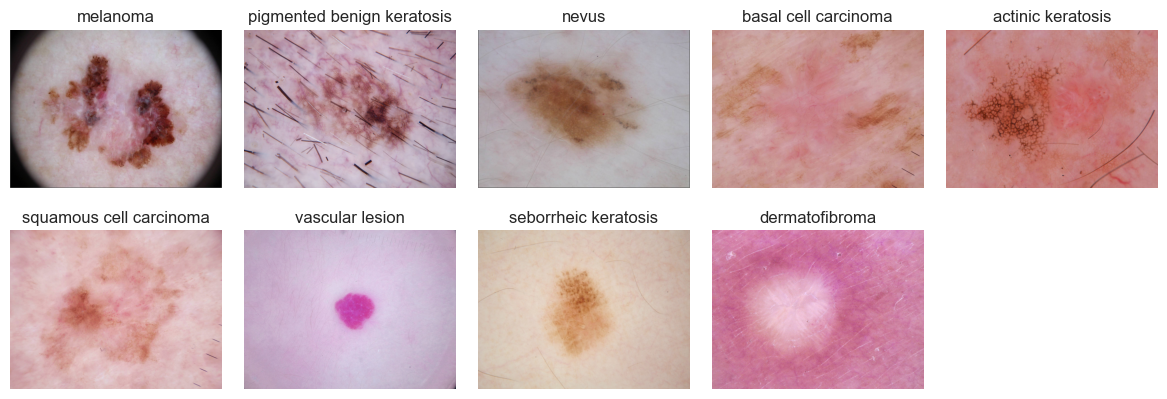

## Baseline model

**Model Building & training:**
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
  - In the dataset.py, I have data generator class where the image pixels are normalized by dividing 255.
- Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
  - Optimizer used throughout the project is Adam with learning rate 1e-4.

Model architecture
- 3 convnets with channels [8, 16, 32] in sequence
- no dropouts

Note that the training setup is equipped with learning rate scheduler and early stopping mechanism, but not using in this project, as recommended.

**notes**:
- Weights are not added to Cross-Entropy loss
- Learning rate decays with multiple 0.1 and patience 5 using the PyTorch ReduceLROnPlateau module.


Current vram: cuda
set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [10:26<00:00,  3.57it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Linear(in_features=15488, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=9, bias=True)
  )
)
Total number of train parameters: 1989785 or (1.99M)


Epoch 1/20: 100%|███████████████████████████████████████████████| 56/56 [00:05<00:00, 10.86it/s, batch_loss=1.966198, epoch_loss=2.079345, learning_rate=0.0001]



>>> [2024-01-17 15:32:29.832916 | 1/20 | Early stopping counter 0] 
    loss          - train: 2.019307      valid: 2.025486 
    accuracy      - train: 0.195980      valid: 0.194196 
    learning rate        : 1.00000e-04



Epoch 2/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.27it/s, batch_loss=1.955803, epoch_loss=2.012016, learning_rate=0.0001]



>>> [2024-01-17 15:32:35.834064 | 2/20 | Early stopping counter 0] 
    loss          - train: 1.999959      valid: 2.005545 
    accuracy      - train: 0.256840      valid: 0.252232 
    learning rate        : 1.00000e-04



Epoch 3/20: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.85it/s, batch_loss=1.924206, epoch_loss=1.993571, learning_rate=0.0001]



>>> [2024-01-17 15:32:41.376536 | 3/20 | Early stopping counter 0] 
    loss          - train: 1.977972      valid: 1.983891 
    accuracy      - train: 0.280849      valid: 0.281250 
    learning rate        : 1.00000e-04



Epoch 4/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.13it/s, batch_loss=2.082740, epoch_loss=1.968163, learning_rate=0.0001]



>>> [2024-01-17 15:32:46.439676 | 4/20 | Early stopping counter 0] 
    loss          - train: 1.945945      valid: 1.953160 
    accuracy      - train: 0.290341      valid: 0.290179 
    learning rate        : 1.00000e-04



Epoch 5/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.80it/s, batch_loss=1.979713, epoch_loss=1.935655, learning_rate=0.0001]



>>> [2024-01-17 15:32:52.094450 | 5/20 | Early stopping counter 0] 
    loss          - train: 1.908364      valid: 1.918181 
    accuracy      - train: 0.310441      valid: 0.316964 
    learning rate        : 1.00000e-04



Epoch 6/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.21it/s, batch_loss=1.819682, epoch_loss=1.886469, learning_rate=0.0001]



>>> [2024-01-17 15:32:57.484829 | 6/20 | Early stopping counter 0] 
    loss          - train: 1.845469      valid: 1.857546 
    accuracy      - train: 0.374093      valid: 0.379464 
    learning rate        : 1.00000e-04



Epoch 7/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.27it/s, batch_loss=1.730264, epoch_loss=1.815313, learning_rate=0.0001]



>>> [2024-01-17 15:33:02.567482 | 7/20 | Early stopping counter 1] 
    loss          - train: 1.782951      valid: 1.802394 
    accuracy      - train: 0.373534      valid: 0.370536 
    learning rate        : 1.00000e-04



Epoch 8/20: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.41it/s, batch_loss=1.670229, epoch_loss=1.758212, learning_rate=0.0001]



>>> [2024-01-17 15:33:08.608759 | 8/20 | Early stopping counter 0] 
    loss          - train: 1.706210      valid: 1.721185 
    accuracy      - train: 0.395310      valid: 0.395089 
    learning rate        : 1.00000e-04



Epoch 9/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.08it/s, batch_loss=1.608509, epoch_loss=1.687890, learning_rate=0.0001]



>>> [2024-01-17 15:33:13.708726 | 9/20 | Early stopping counter 0] 
    loss          - train: 1.655231      valid: 1.672560 
    accuracy      - train: 0.399777      valid: 0.417411 
    learning rate        : 1.00000e-04



Epoch 10/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 21.29it/s, batch_loss=1.723475, epoch_loss=1.644136, learning_rate=0.0001]



>>> [2024-01-17 15:33:18.766311 | 10/20 | Early stopping counter 1] 
    loss          - train: 1.638556      valid: 1.644200 
    accuracy      - train: 0.387493      valid: 0.399554 
    learning rate        : 1.00000e-04



Epoch 11/20: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.48it/s, batch_loss=1.592718, epoch_loss=1.595349, learning_rate=0.0001]



>>> [2024-01-17 15:33:24.721474 | 11/20 | Early stopping counter 0] 
    loss          - train: 1.557469      valid: 1.574884 
    accuracy      - train: 0.458403      valid: 0.462054 
    learning rate        : 1.00000e-04



Epoch 12/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 21.11it/s, batch_loss=1.351941, epoch_loss=1.564946, learning_rate=0.0001]



>>> [2024-01-17 15:33:29.842418 | 12/20 | Early stopping counter 1] 
    loss          - train: 1.541959      valid: 1.570925 
    accuracy      - train: 0.450028      valid: 0.459821 
    learning rate        : 1.00000e-04



Epoch 13/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 21.07it/s, batch_loss=1.531045, epoch_loss=1.533283, learning_rate=0.0001]



>>> [2024-01-17 15:33:35.257760 | 13/20 | Early stopping counter 0] 
    loss          - train: 1.505058      valid: 1.533413 
    accuracy      - train: 0.479620      valid: 0.475446 
    learning rate        : 1.00000e-04



Epoch 14/20: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.29it/s, batch_loss=1.438343, epoch_loss=1.499300, learning_rate=0.0001]



>>> [2024-01-17 15:33:40.953341 | 14/20 | Early stopping counter 0] 
    loss          - train: 1.480665      valid: 1.504621 
    accuracy      - train: 0.481854      valid: 0.479911 
    learning rate        : 1.00000e-04



Epoch 15/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.93it/s, batch_loss=1.418496, epoch_loss=1.484261, learning_rate=0.0001]



>>> [2024-01-17 15:33:46.078451 | 15/20 | Early stopping counter 1] 
    loss          - train: 1.475676      valid: 1.502681 
    accuracy      - train: 0.467895      valid: 0.470982 
    learning rate        : 1.00000e-04



Epoch 16/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 21.36it/s, batch_loss=1.428900, epoch_loss=1.471887, learning_rate=0.0001]



>>> [2024-01-17 15:33:51.671180 | 16/20 | Early stopping counter 0] 
    loss          - train: 1.474916      valid: 1.509482 
    accuracy      - train: 0.484087      valid: 0.500000 
    learning rate        : 1.00000e-04



Epoch 17/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 18.89it/s, batch_loss=1.589560, epoch_loss=1.451414, learning_rate=0.0001]



>>> [2024-01-17 15:33:57.087674 | 17/20 | Early stopping counter 1] 
    loss          - train: 1.436416      valid: 1.467074 
    accuracy      - train: 0.486320      valid: 0.484375 
    learning rate        : 1.00000e-04



Epoch 18/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.80it/s, batch_loss=1.604591, epoch_loss=1.447045, learning_rate=0.0001]



>>> [2024-01-17 15:34:02.239725 | 18/20 | Early stopping counter 2] 
    loss          - train: 1.435446      valid: 1.471292 
    accuracy      - train: 0.486320      valid: 0.493304 
    learning rate        : 1.00000e-04



Epoch 19/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.32it/s, batch_loss=1.335504, epoch_loss=1.431096, learning_rate=0.0001]



>>> [2024-01-17 15:34:08.129578 | 19/20 | Early stopping counter 0] 
    loss          - train: 1.443045      valid: 1.478554 
    accuracy      - train: 0.491904      valid: 0.500000 
    learning rate        : 1.00000e-04



Epoch 20/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.39it/s, batch_loss=1.369306, epoch_loss=1.421089, learning_rate=0.0001]



>>> [2024-01-17 15:34:13.341884 | 20/20 | Early stopping counter 0] 
    loss          - train: 1.400418      valid: 1.435781 
    accuracy      - train: 0.502513      valid: 0.504464 
    learning rate        : 1.00000e-04



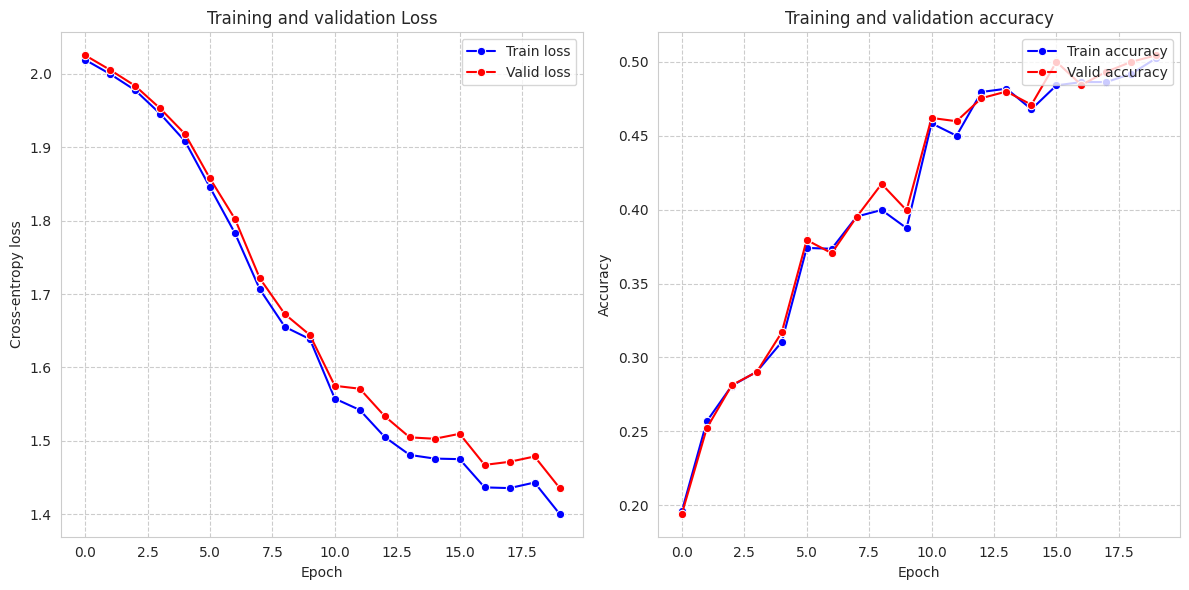

In [4]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-4
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 20

# Model arch
config.model_arch_depth = [8, 16, 32]
config.dropout_map = [0] * len(config.model_arch_depth)
config.dropout_fc = []

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- Train and test loss and accuracy are moving in parallel.
- Becasue the train accuracy is not maxed (or the loss dropped to 0), it is a sign of underfitting.
- I can try with increasing the learnign rate, run for more epochs, and increase the complexity of the model by adding more units.

**Baseline 2:** Overfit the model on train images
- Increased learning rate to 1e-3 and also trained for 200 epochs
- Included early stopping for the training to stop if the accuracy do not increase for 20 epoch in sequence.

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 13147.59it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Linear(in_features=15488, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=9, bias=True)
  )
)
Total number of train parameters: 1989785 or (1.99M)


Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.86it/s, batch_loss=1.974767, epoch_loss=2.044628, learning_rate=0.001]



>>> [2024-01-17 15:34:33.935666 | 1/200 | Early stopping counter 0] 
    loss          - train: 2.012581      valid: 2.014429 
    accuracy      - train: 0.195980      valid: 0.194196 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.80it/s, batch_loss=1.884041, epoch_loss=1.952955, learning_rate=0.001]



>>> [2024-01-17 15:34:39.746523 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.857490      valid: 1.856737 
    accuracy      - train: 0.346734      valid: 0.345982 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.97it/s, batch_loss=1.744361, epoch_loss=1.792872, learning_rate=0.001]



>>> [2024-01-17 15:34:45.034778 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.657579      valid: 1.692064 
    accuracy      - train: 0.404243      valid: 0.372768 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.51it/s, batch_loss=1.706952, epoch_loss=1.705392, learning_rate=0.001]



>>> [2024-01-17 15:34:50.913635 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.586061      valid: 1.621917 
    accuracy      - train: 0.423227      valid: 0.417411 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.04it/s, batch_loss=1.598277, epoch_loss=1.546801, learning_rate=0.001]



>>> [2024-01-17 15:34:56.843478 | 5/200 | Early stopping counter 1] 
    loss          - train: 1.590397      valid: 1.665719 
    accuracy      - train: 0.380235      valid: 0.368304 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.16it/s, batch_loss=1.267299, epoch_loss=1.454336, learning_rate=0.001]



>>> [2024-01-17 15:35:02.390854 | 6/200 | Early stopping counter 0] 
    loss          - train: 1.348664      valid: 1.400038 
    accuracy      - train: 0.525405      valid: 0.526786 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.14it/s, batch_loss=1.208335, epoch_loss=1.350189, learning_rate=0.001]



>>> [2024-01-17 15:35:08.356634 | 7/200 | Early stopping counter 0] 
    loss          - train: 1.280913      valid: 1.338433 
    accuracy      - train: 0.541597      valid: 0.560268 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.94it/s, batch_loss=1.279100, epoch_loss=1.328312, learning_rate=0.001]



>>> [2024-01-17 15:35:13.539929 | 8/200 | Early stopping counter 1] 
    loss          - train: 1.328564      valid: 1.439602 
    accuracy      - train: 0.530430      valid: 0.515625 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.43it/s, batch_loss=1.139647, epoch_loss=1.275781, learning_rate=0.001]



>>> [2024-01-17 15:35:19.496843 | 9/200 | Early stopping counter 0] 
    loss          - train: 1.173102      valid: 1.292448 
    accuracy      - train: 0.584590      valid: 0.575893 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.85it/s, batch_loss=1.307873, epoch_loss=1.191350, learning_rate=0.001]



>>> [2024-01-17 15:35:25.081779 | 10/200 | Early stopping counter 1] 
    loss          - train: 1.098600      valid: 1.262414 
    accuracy      - train: 0.605248      valid: 0.553571 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 21.11it/s, batch_loss=1.247342, epoch_loss=1.195325, learning_rate=0.001]



>>> [2024-01-17 15:35:30.182127 | 11/200 | Early stopping counter 2] 
    loss          - train: 1.102853      valid: 1.281784 
    accuracy      - train: 0.601898      valid: 0.564732 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.01it/s, batch_loss=0.777493, epoch_loss=1.103587, learning_rate=0.001]



>>> [2024-01-17 15:35:35.952674 | 12/200 | Early stopping counter 3] 
    loss          - train: 1.101336      valid: 1.318439 
    accuracy      - train: 0.607482      valid: 0.560268 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.61it/s, batch_loss=1.120263, epoch_loss=1.125698, learning_rate=0.001]



>>> [2024-01-17 15:35:41.238223 | 13/200 | Early stopping counter 4] 
    loss          - train: 1.042634      valid: 1.297684 
    accuracy      - train: 0.619765      valid: 0.551339 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.57it/s, batch_loss=0.956265, epoch_loss=1.030702, learning_rate=0.001]



>>> [2024-01-17 15:35:46.445623 | 14/200 | Early stopping counter 5] 
    loss          - train: 0.945811      valid: 1.213896 
    accuracy      - train: 0.651591      valid: 0.573661 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.96it/s, batch_loss=1.021048, epoch_loss=0.949069, learning_rate=0.001]



>>> [2024-01-17 15:35:52.488568 | 15/200 | Early stopping counter 6] 
    loss          - train: 0.981358      valid: 1.373047 
    accuracy      - train: 0.635958      valid: 0.549107 
    learning rate        : 1.00000e-04



Epoch 16/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.94it/s, batch_loss=0.819490, epoch_loss=0.865926, learning_rate=0.0001]



>>> [2024-01-17 15:35:57.599444 | 16/200 | Early stopping counter 0] 
    loss          - train: 0.812257      valid: 1.206323 
    accuracy      - train: 0.710776      valid: 0.591518 
    learning rate        : 1.00000e-04



Epoch 17/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 21.10it/s, batch_loss=0.759108, epoch_loss=0.816647, learning_rate=0.0001]



>>> [2024-01-17 15:36:02.864511 | 17/200 | Early stopping counter 0] 
    loss          - train: 0.798076      valid: 1.213320 
    accuracy      - train: 0.719710      valid: 0.595982 
    learning rate        : 1.00000e-04



Epoch 18/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.12it/s, batch_loss=0.939967, epoch_loss=0.801630, learning_rate=0.0001]



>>> [2024-01-17 15:36:08.833162 | 18/200 | Early stopping counter 1] 
    loss          - train: 0.781709      valid: 1.221428 
    accuracy      - train: 0.721385      valid: 0.584821 
    learning rate        : 1.00000e-04



Epoch 19/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.92it/s, batch_loss=0.723424, epoch_loss=0.789653, learning_rate=0.0001]



>>> [2024-01-17 15:36:14.011640 | 19/200 | Early stopping counter 2] 
    loss          - train: 0.788527      valid: 1.239093 
    accuracy      - train: 0.725293      valid: 0.584821 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 21.12it/s, batch_loss=0.670249, epoch_loss=0.785830, learning_rate=0.0001]



>>> [2024-01-17 15:36:19.534953 | 20/200 | Early stopping counter 0] 
    loss          - train: 0.765058      valid: 1.231805 
    accuracy      - train: 0.722501      valid: 0.595982 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.10it/s, batch_loss=0.857824, epoch_loss=0.769086, learning_rate=0.0001]



>>> [2024-01-17 15:36:25.487618 | 21/200 | Early stopping counter 0] 
    loss          - train: 0.756080      valid: 1.233300 
    accuracy      - train: 0.732552      valid: 0.595982 
    learning rate        : 1.00000e-04



Epoch 22/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 21.09it/s, batch_loss=0.680788, epoch_loss=0.757680, learning_rate=0.0001]



>>> [2024-01-17 15:36:30.630154 | 22/200 | Early stopping counter 1] 
    loss          - train: 0.744260      valid: 1.235607 
    accuracy      - train: 0.747069      valid: 0.591518 
    learning rate        : 1.00000e-04



Epoch 23/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.66it/s, batch_loss=0.825815, epoch_loss=0.748459, learning_rate=0.0001]



>>> [2024-01-17 15:36:36.486762 | 23/200 | Early stopping counter 2] 
    loss          - train: 0.732106      valid: 1.235503 
    accuracy      - train: 0.743160      valid: 0.587054 
    learning rate        : 1.00000e-05



Epoch 24/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.65it/s, batch_loss=0.867353, epoch_loss=0.732103, learning_rate=1e-5]



>>> [2024-01-17 15:36:41.756337 | 24/200 | Early stopping counter 3] 
    loss          - train: 0.728669      valid: 1.234019 
    accuracy      - train: 0.740927      valid: 0.591518 
    learning rate        : 1.00000e-05



Epoch 25/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.41it/s, batch_loss=0.706106, epoch_loss=0.729181, learning_rate=1e-5]



>>> [2024-01-17 15:36:46.984422 | 25/200 | Early stopping counter 4] 
    loss          - train: 0.727063      valid: 1.233867 
    accuracy      - train: 0.745952      valid: 0.589286 
    learning rate        : 1.00000e-05



Epoch 26/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.07it/s, batch_loss=1.067091, epoch_loss=0.728250, learning_rate=1e-5]



>>> [2024-01-17 15:36:53.019974 | 26/200 | Early stopping counter 5] 
    loss          - train: 0.725723      valid: 1.234323 
    accuracy      - train: 0.743160      valid: 0.591518 
    learning rate        : 1.00000e-05



Epoch 27/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.95it/s, batch_loss=0.618476, epoch_loss=0.726930, learning_rate=1e-5]



>>> [2024-01-17 15:36:58.164077 | 27/200 | Early stopping counter 6] 
    loss          - train: 0.724948      valid: 1.234350 
    accuracy      - train: 0.745952      valid: 0.593750 
    learning rate        : 1.00000e-05



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.09it/s, batch_loss=0.690236, epoch_loss=0.727112, learning_rate=1e-5]



>>> [2024-01-17 15:37:03.385852 | 28/200 | Early stopping counter 7] 
    loss          - train: 0.723856      valid: 1.235848 
    accuracy      - train: 0.743160      valid: 0.591518 
    learning rate        : 1.00000e-05



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.41it/s, batch_loss=0.956918, epoch_loss=0.725214, learning_rate=1e-5]



>>> [2024-01-17 15:37:09.319805 | 29/200 | Early stopping counter 0] 
    loss          - train: 0.723252      valid: 1.237026 
    accuracy      - train: 0.743719      valid: 0.595982 
    learning rate        : 1.00000e-06



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.06it/s, batch_loss=0.596463, epoch_loss=0.723142, learning_rate=1e-6]



>>> [2024-01-17 15:37:14.439961 | 30/200 | Early stopping counter 1] 
    loss          - train: 0.722814      valid: 1.236928 
    accuracy      - train: 0.742602      valid: 0.593750 
    learning rate        : 1.00000e-06



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.14it/s, batch_loss=0.699960, epoch_loss=0.723042, learning_rate=1e-6]



>>> [2024-01-17 15:37:19.909396 | 31/200 | Early stopping counter 2] 
    loss          - train: 0.722689      valid: 1.236776 
    accuracy      - train: 0.743719      valid: 0.593750 
    learning rate        : 1.00000e-06



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.43it/s, batch_loss=0.677566, epoch_loss=0.722943, learning_rate=1e-6]



>>> [2024-01-17 15:37:25.557029 | 32/200 | Early stopping counter 3] 
    loss          - train: 0.722592      valid: 1.236722 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-06



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.00it/s, batch_loss=0.688273, epoch_loss=0.722767, learning_rate=1e-6]



>>> [2024-01-17 15:37:30.675121 | 33/200 | Early stopping counter 4] 
    loss          - train: 0.722469      valid: 1.236835 
    accuracy      - train: 0.743719      valid: 0.593750 
    learning rate        : 1.00000e-06



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.33it/s, batch_loss=0.649287, epoch_loss=0.722625, learning_rate=1e-6]



>>> [2024-01-17 15:37:36.427095 | 34/200 | Early stopping counter 5] 
    loss          - train: 0.722598      valid: 1.236905 
    accuracy      - train: 0.743719      valid: 0.593750 
    learning rate        : 1.00000e-06



Epoch 35/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.20it/s, batch_loss=0.999027, epoch_loss=0.722686, learning_rate=1e-6]



>>> [2024-01-17 15:37:41.780316 | 35/200 | Early stopping counter 6] 
    loss          - train: 0.722440      valid: 1.236995 
    accuracy      - train: 0.744835      valid: 0.593750 
    learning rate        : 1.00000e-07



Epoch 36/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.14it/s, batch_loss=0.696383, epoch_loss=0.722355, learning_rate=1e-7]



>>> [2024-01-17 15:37:46.895428 | 36/200 | Early stopping counter 7] 
    loss          - train: 0.722359      valid: 1.237005 
    accuracy      - train: 0.744835      valid: 0.593750 
    learning rate        : 1.00000e-07



Epoch 37/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.76it/s, batch_loss=0.706988, epoch_loss=0.722341, learning_rate=1e-7]



>>> [2024-01-17 15:37:52.879173 | 37/200 | Early stopping counter 8] 
    loss          - train: 0.722461      valid: 1.236996 
    accuracy      - train: 0.744835      valid: 0.593750 
    learning rate        : 1.00000e-07



Epoch 38/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.65it/s, batch_loss=0.751679, epoch_loss=0.722378, learning_rate=1e-7]



>>> [2024-01-17 15:37:58.085809 | 38/200 | Early stopping counter 9] 
    loss          - train: 0.722378      valid: 1.236991 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-07



Epoch 39/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.13it/s, batch_loss=0.657976, epoch_loss=0.722309, learning_rate=1e-7]



>>> [2024-01-17 15:38:03.149285 | 39/200 | Early stopping counter 10] 
    loss          - train: 0.722423      valid: 1.237008 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-07



Epoch 40/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.44it/s, batch_loss=0.706422, epoch_loss=0.722292, learning_rate=1e-7]



>>> [2024-01-17 15:38:09.169121 | 40/200 | Early stopping counter 11] 
    loss          - train: 0.722424      valid: 1.237011 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-07



Epoch 41/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.93it/s, batch_loss=0.642526, epoch_loss=0.722293, learning_rate=1e-7]



>>> [2024-01-17 15:38:14.297029 | 41/200 | Early stopping counter 12] 
    loss          - train: 0.722214      valid: 1.237009 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



Epoch 42/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.16it/s, batch_loss=0.636080, epoch_loss=0.722263, learning_rate=1e-8]



>>> [2024-01-17 15:38:19.586983 | 42/200 | Early stopping counter 13] 
    loss          - train: 0.722277      valid: 1.237010 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



Epoch 43/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.64it/s, batch_loss=0.699926, epoch_loss=0.722295, learning_rate=1e-8]



>>> [2024-01-17 15:38:25.296722 | 43/200 | Early stopping counter 14] 
    loss          - train: 0.722339      valid: 1.237010 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



Epoch 44/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.99it/s, batch_loss=0.465914, epoch_loss=0.722164, learning_rate=1e-8]



>>> [2024-01-17 15:38:30.443017 | 44/200 | Early stopping counter 15] 
    loss          - train: 0.722446      valid: 1.237011 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



Epoch 45/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.61it/s, batch_loss=0.587349, epoch_loss=0.722233, learning_rate=1e-8]



>>> [2024-01-17 15:38:38.864263 | 45/200 | Early stopping counter 16] 
    loss          - train: 0.722236      valid: 1.237010 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



Epoch 46/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.34it/s, batch_loss=0.797998, epoch_loss=0.722333, learning_rate=1e-8]



>>> [2024-01-17 15:38:45.029435 | 46/200 | Early stopping counter 17] 
    loss          - train: 0.722366      valid: 1.237011 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



Epoch 47/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.95it/s, batch_loss=0.772918, epoch_loss=0.722331, learning_rate=1e-8]



>>> [2024-01-17 15:38:51.812231 | 47/200 | Early stopping counter 18] 
    loss          - train: 0.722154      valid: 1.237011 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



Epoch 48/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.77it/s, batch_loss=0.745098, epoch_loss=0.722313, learning_rate=1e-8]



>>> [2024-01-17 15:38:57.840453 | 48/200 | Early stopping counter 19] 
    loss          - train: 0.722263      valid: 1.237011 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



Epoch 49/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.69it/s, batch_loss=0.753221, epoch_loss=0.722319, learning_rate=1e-8]



>>> [2024-01-17 15:39:03.328171 | 49/200 | Early stopping counter 20] 
    loss          - train: 0.722473      valid: 1.237011 
    accuracy      - train: 0.744277      valid: 0.593750 
    learning rate        : 1.00000e-08



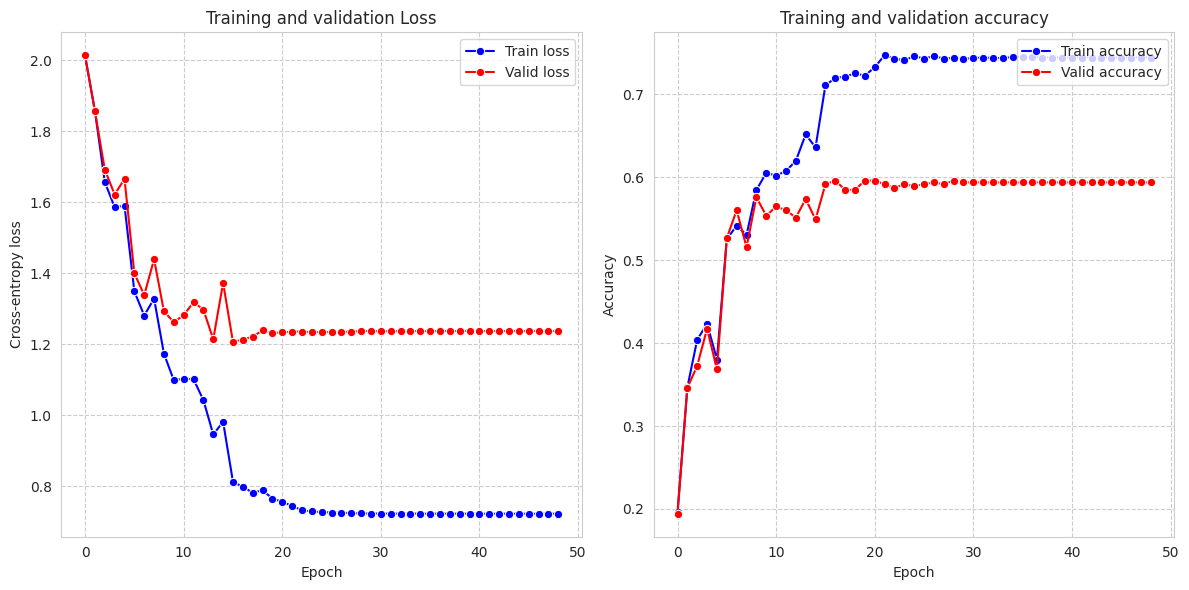

In [5]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [8, 16, 32]
config.dropout_map = [0] * len(config.model_arch_depth)
config.dropout_fc = []

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- With increasing the learning and training for longer epochs, the model started to overfit.
- Validation accuracy increased from 0.500 to 0.596
- Learning rate lower than 1e-5 have no affect on the model performance. Because the it takes only 2 seconds to train an epoch, I left the early stopping to 20.

**Baseline 3:** Overfit the model on train images
- Increased learning rate to 1e-3 and also trained for 200 epochs
- Included early stopping for the training to stop if the accuracy do not increase for 20 epoch in sequence.
- Increase the complexity of the model arch. by increasing units in the 3-convnets from [8, 16, 32] to [12, 24, 48]

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 13342.38it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Linear(in_features=23232, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=9, bias=True)
  )
)
Total number of train parameters: 2988353 or (2.99M)


Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 14.02it/s, batch_loss=1.737903, epoch_loss=1.987735, learning_rate=0.001]



>>> [2024-01-17 15:39:37.376217 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.835296      valid: 1.848410 
    accuracy      - train: 0.353434      valid: 0.359375 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.79it/s, batch_loss=1.644941, epoch_loss=1.670324, learning_rate=0.001]



>>> [2024-01-17 15:39:43.241304 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.492496      valid: 1.542726 
    accuracy      - train: 0.459520      valid: 0.464286 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.52it/s, batch_loss=1.378292, epoch_loss=1.490948, learning_rate=0.001]



>>> [2024-01-17 15:39:49.061609 | 3/200 | Early stopping counter 1] 
    loss          - train: 1.636183      valid: 1.693442 
    accuracy      - train: 0.436069      valid: 0.444196 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.86it/s, batch_loss=1.521725, epoch_loss=1.393551, learning_rate=0.001]



>>> [2024-01-17 15:39:54.866727 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.269656      valid: 1.369314 
    accuracy      - train: 0.551647      valid: 0.537946 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.10it/s, batch_loss=1.826883, epoch_loss=1.305390, learning_rate=0.001]



>>> [2024-01-17 15:40:00.132014 | 5/200 | Early stopping counter 1] 
    loss          - train: 1.219957      valid: 1.338053 
    accuracy      - train: 0.566164      valid: 0.526786 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.76it/s, batch_loss=1.356595, epoch_loss=1.238963, learning_rate=0.001]



>>> [2024-01-17 15:40:06.180136 | 6/200 | Early stopping counter 0] 
    loss          - train: 1.142059      valid: 1.298306 
    accuracy      - train: 0.603015      valid: 0.553571 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.76it/s, batch_loss=1.142659, epoch_loss=1.289562, learning_rate=0.001]



>>> [2024-01-17 15:40:11.668357 | 7/200 | Early stopping counter 1] 
    loss          - train: 1.264288      valid: 1.398654 
    accuracy      - train: 0.547180      valid: 0.502232 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.92it/s, batch_loss=0.944635, epoch_loss=1.210488, learning_rate=0.001]



>>> [2024-01-17 15:40:17.016195 | 8/200 | Early stopping counter 2] 
    loss          - train: 1.222147      valid: 1.401962 
    accuracy      - train: 0.558906      valid: 0.495536 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.41it/s, batch_loss=0.855992, epoch_loss=1.082841, learning_rate=0.001]



>>> [2024-01-17 15:40:23.305616 | 9/200 | Early stopping counter 3] 
    loss          - train: 0.965410      valid: 1.340398 
    accuracy      - train: 0.652708      valid: 0.544643 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.63it/s, batch_loss=0.737019, epoch_loss=1.030523, learning_rate=0.001]



>>> [2024-01-17 15:40:28.841881 | 10/200 | Early stopping counter 4] 
    loss          - train: 0.921693      valid: 1.298776 
    accuracy      - train: 0.685092      valid: 0.537946 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.95it/s, batch_loss=0.856951, epoch_loss=0.978024, learning_rate=0.001]



>>> [2024-01-17 15:40:34.644972 | 11/200 | Early stopping counter 0] 
    loss          - train: 0.818158      valid: 1.306416 
    accuracy      - train: 0.710776      valid: 0.553571 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.39it/s, batch_loss=0.625453, epoch_loss=0.869976, learning_rate=0.001]



>>> [2024-01-17 15:40:40.381606 | 12/200 | Early stopping counter 1] 
    loss          - train: 0.802686      valid: 1.467539 
    accuracy      - train: 0.719151      valid: 0.546875 
    learning rate        : 1.00000e-04



Epoch 13/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.15it/s, batch_loss=0.615893, epoch_loss=0.727838, learning_rate=0.0001]



>>> [2024-01-17 15:40:45.662025 | 13/200 | Early stopping counter 0] 
    loss          - train: 0.678808      valid: 1.327238 
    accuracy      - train: 0.765494      valid: 0.564732 
    learning rate        : 1.00000e-04



Epoch 14/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.28it/s, batch_loss=0.598921, epoch_loss=0.679826, learning_rate=0.0001]



>>> [2024-01-17 15:40:51.844918 | 14/200 | Early stopping counter 0] 
    loss          - train: 0.652205      valid: 1.351537 
    accuracy      - train: 0.767169      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 15/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.68it/s, batch_loss=0.382332, epoch_loss=0.662827, learning_rate=0.0001]



>>> [2024-01-17 15:40:57.187983 | 15/200 | Early stopping counter 1] 
    loss          - train: 0.634942      valid: 1.365549 
    accuracy      - train: 0.776661      valid: 0.558036 
    learning rate        : 1.00000e-04



Epoch 16/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.50it/s, batch_loss=0.716355, epoch_loss=0.642792, learning_rate=0.0001]



>>> [2024-01-17 15:41:02.758980 | 16/200 | Early stopping counter 2] 
    loss          - train: 0.622636      valid: 1.361292 
    accuracy      - train: 0.780011      valid: 0.564732 
    learning rate        : 1.00000e-04



Epoch 17/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 16.52it/s, batch_loss=0.753342, epoch_loss=0.626897, learning_rate=0.0001]



>>> [2024-01-17 15:41:08.927488 | 17/200 | Early stopping counter 3] 
    loss          - train: 0.609625      valid: 1.371258 
    accuracy      - train: 0.787270      valid: 0.560268 
    learning rate        : 1.00000e-04



Epoch 18/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.79it/s, batch_loss=0.858555, epoch_loss=0.620081, learning_rate=0.0001]



>>> [2024-01-17 15:41:14.347907 | 18/200 | Early stopping counter 4] 
    loss          - train: 0.598961      valid: 1.398751 
    accuracy      - train: 0.783920      valid: 0.566964 
    learning rate        : 1.00000e-04



Epoch 19/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.67it/s, batch_loss=0.537436, epoch_loss=0.605516, learning_rate=0.0001]



>>> [2024-01-17 15:41:20.328925 | 19/200 | Early stopping counter 5] 
    loss          - train: 0.586130      valid: 1.428946 
    accuracy      - train: 0.791178      valid: 0.562500 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.77it/s, batch_loss=0.880532, epoch_loss=0.595544, learning_rate=0.0001]



>>> [2024-01-17 15:41:26.023130 | 20/200 | Early stopping counter 6] 
    loss          - train: 0.577800      valid: 1.423946 
    accuracy      - train: 0.796762      valid: 0.553571 
    learning rate        : 1.00000e-05



Epoch 21/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.68it/s, batch_loss=0.782882, epoch_loss=0.573918, learning_rate=1e-5]



>>> [2024-01-17 15:41:31.458037 | 21/200 | Early stopping counter 7] 
    loss          - train: 0.569026      valid: 1.422212 
    accuracy      - train: 0.804020      valid: 0.558036 
    learning rate        : 1.00000e-05



Epoch 22/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.13it/s, batch_loss=0.768733, epoch_loss=0.570339, learning_rate=1e-5]



>>> [2024-01-17 15:41:37.713608 | 22/200 | Early stopping counter 8] 
    loss          - train: 0.567283      valid: 1.424645 
    accuracy      - train: 0.806253      valid: 0.560268 
    learning rate        : 1.00000e-05



Epoch 23/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.72it/s, batch_loss=0.756879, epoch_loss=0.568403, learning_rate=1e-5]



>>> [2024-01-17 15:41:43.155988 | 23/200 | Early stopping counter 9] 
    loss          - train: 0.565735      valid: 1.428148 
    accuracy      - train: 0.804020      valid: 0.558036 
    learning rate        : 1.00000e-05



Epoch 24/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.85it/s, batch_loss=0.318749, epoch_loss=0.567175, learning_rate=1e-5]



>>> [2024-01-17 15:41:48.812874 | 24/200 | Early stopping counter 10] 
    loss          - train: 0.564230      valid: 1.430151 
    accuracy      - train: 0.805695      valid: 0.558036 
    learning rate        : 1.00000e-05



Epoch 25/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.77it/s, batch_loss=0.646518, epoch_loss=0.566225, learning_rate=1e-5]



>>> [2024-01-17 15:41:54.850637 | 25/200 | Early stopping counter 11] 
    loss          - train: 0.563011      valid: 1.433198 
    accuracy      - train: 0.804020      valid: 0.558036 
    learning rate        : 1.00000e-05



Epoch 26/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.06it/s, batch_loss=0.526192, epoch_loss=0.564471, learning_rate=1e-5]



>>> [2024-01-17 15:42:00.267399 | 26/200 | Early stopping counter 12] 
    loss          - train: 0.561730      valid: 1.432345 
    accuracy      - train: 0.804578      valid: 0.558036 
    learning rate        : 1.00000e-06



Epoch 27/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.39it/s, batch_loss=0.318088, epoch_loss=0.561644, learning_rate=1e-6]



>>> [2024-01-17 15:42:06.675179 | 27/200 | Early stopping counter 13] 
    loss          - train: 0.561549      valid: 1.432961 
    accuracy      - train: 0.804578      valid: 0.560268 
    learning rate        : 1.00000e-06



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.51it/s, batch_loss=0.563802, epoch_loss=0.561663, learning_rate=1e-6]



>>> [2024-01-17 15:42:12.215975 | 28/200 | Early stopping counter 14] 
    loss          - train: 0.561302      valid: 1.433339 
    accuracy      - train: 0.804020      valid: 0.560268 
    learning rate        : 1.00000e-06



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.74it/s, batch_loss=0.727043, epoch_loss=0.561683, learning_rate=1e-6]



>>> [2024-01-17 15:42:17.595496 | 29/200 | Early stopping counter 15] 
    loss          - train: 0.561226      valid: 1.433407 
    accuracy      - train: 0.804020      valid: 0.560268 
    learning rate        : 1.00000e-06



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.71it/s, batch_loss=0.589663, epoch_loss=0.561408, learning_rate=1e-6]



>>> [2024-01-17 15:42:23.891570 | 30/200 | Early stopping counter 16] 
    loss          - train: 0.561055      valid: 1.433775 
    accuracy      - train: 0.804020      valid: 0.560268 
    learning rate        : 1.00000e-06



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.50it/s, batch_loss=0.608271, epoch_loss=0.561267, learning_rate=1e-6]



>>> [2024-01-17 15:42:29.300089 | 31/200 | Early stopping counter 17] 
    loss          - train: 0.561003      valid: 1.434143 
    accuracy      - train: 0.804020      valid: 0.560268 
    learning rate        : 1.00000e-06



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.89it/s, batch_loss=0.401494, epoch_loss=0.561048, learning_rate=1e-6]



>>> [2024-01-17 15:42:35.087234 | 32/200 | Early stopping counter 18] 
    loss          - train: 0.560883      valid: 1.434344 
    accuracy      - train: 0.804020      valid: 0.560268 
    learning rate        : 1.00000e-07



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.49it/s, batch_loss=0.648631, epoch_loss=0.560911, learning_rate=1e-7]



>>> [2024-01-17 15:42:41.028166 | 33/200 | Early stopping counter 19] 
    loss          - train: 0.560917      valid: 1.434366 
    accuracy      - train: 0.804020      valid: 0.560268 
    learning rate        : 1.00000e-07



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.63it/s, batch_loss=0.522454, epoch_loss=0.560786, learning_rate=1e-7]



>>> [2024-01-17 15:42:46.489043 | 34/200 | Early stopping counter 20] 
    loss          - train: 0.560788      valid: 1.434390 
    accuracy      - train: 0.804020      valid: 0.560268 
    learning rate        : 1.00000e-07



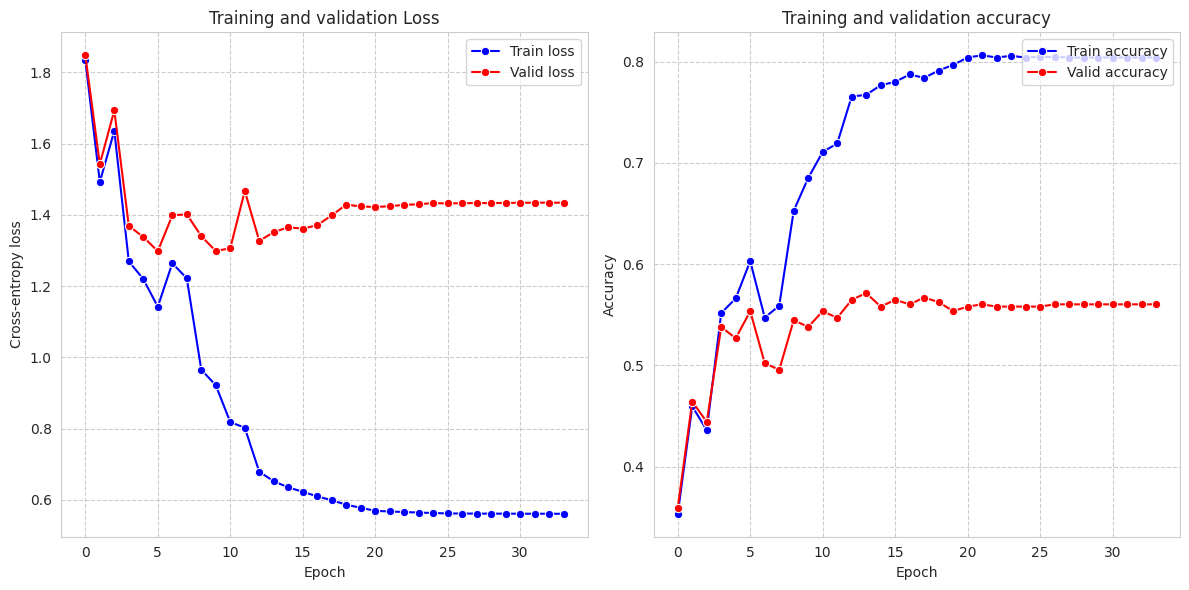

In [6]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [12, 24, 48]
config.dropout_map = [0] * len(config.model_arch_depth)
config.dropout_fc = []

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- With increasing the learning and training for longer epochs, the model overfitted on train images more.
- Validation accuracy dropped from 0.596 to 0.571

**Baseline 4:** Introduce dropout to reduce overfitting
- With same model arch, introduce dropouts of [0, 0.1, 0.2] after 3 convnets, and 0.2 each in the fully connected layers.

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 13179.68it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.1, inplace=False)
    (7): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Dropout(p=0.2, inplace=False)
    (11): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=23232, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=

Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.34it/s, batch_loss=1.862557, epoch_loss=2.014217, learning_rate=0.001]



>>> [2024-01-17 15:42:54.424274 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.965000      valid: 1.973628 
    accuracy      - train: 0.288107      valid: 0.272321 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.62it/s, batch_loss=1.570474, epoch_loss=1.794602, learning_rate=0.001]



>>> [2024-01-17 15:42:59.823971 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.610919      valid: 1.625307 
    accuracy      - train: 0.477387      valid: 0.446429 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.49it/s, batch_loss=1.609777, epoch_loss=1.606564, learning_rate=0.001]



>>> [2024-01-17 15:43:05.695986 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.452172      valid: 1.481056 
    accuracy      - train: 0.508096      valid: 0.493304 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.74it/s, batch_loss=1.566064, epoch_loss=1.490920, learning_rate=0.001]



>>> [2024-01-17 15:43:11.609781 | 4/200 | Early stopping counter 1] 
    loss          - train: 1.574143      valid: 1.628074 
    accuracy      - train: 0.448353      valid: 0.446429 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.70it/s, batch_loss=1.584725, epoch_loss=1.405198, learning_rate=0.001]



>>> [2024-01-17 15:43:16.955533 | 5/200 | Early stopping counter 0] 
    loss          - train: 1.290410      valid: 1.344887 
    accuracy      - train: 0.562814      valid: 0.540179 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.20it/s, batch_loss=1.440538, epoch_loss=1.412576, learning_rate=0.001]



>>> [2024-01-17 15:43:23.330222 | 6/200 | Early stopping counter 1] 
    loss          - train: 1.315676      valid: 1.390346 
    accuracy      - train: 0.546622      valid: 0.533482 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.66it/s, batch_loss=1.387284, epoch_loss=1.306964, learning_rate=0.001]



>>> [2024-01-17 15:43:28.822230 | 7/200 | Early stopping counter 0] 
    loss          - train: 1.194573      valid: 1.298086 
    accuracy      - train: 0.582915      valid: 0.546875 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.74it/s, batch_loss=1.629338, epoch_loss=1.318732, learning_rate=0.001]



>>> [2024-01-17 15:43:34.202084 | 8/200 | Early stopping counter 1] 
    loss          - train: 1.352527      valid: 1.459831 
    accuracy      - train: 0.519263      valid: 0.486607 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.22it/s, batch_loss=1.204132, epoch_loss=1.261499, learning_rate=0.001]



>>> [2024-01-17 15:43:40.443326 | 9/200 | Early stopping counter 0] 
    loss          - train: 1.185379      valid: 1.328426 
    accuracy      - train: 0.591848      valid: 0.549107 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.56it/s, batch_loss=1.545485, epoch_loss=1.198106, learning_rate=0.001]



>>> [2024-01-17 15:43:45.771016 | 10/200 | Early stopping counter 0] 
    loss          - train: 1.103834      valid: 1.279325 
    accuracy      - train: 0.609157      valid: 0.551339 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.81it/s, batch_loss=1.181579, epoch_loss=1.186295, learning_rate=0.001]



>>> [2024-01-17 15:43:51.635711 | 11/200 | Early stopping counter 0] 
    loss          - train: 1.088971      valid: 1.298323 
    accuracy      - train: 0.623116      valid: 0.553571 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.66it/s, batch_loss=1.091125, epoch_loss=1.140753, learning_rate=0.001]



>>> [2024-01-17 15:43:57.270942 | 12/200 | Early stopping counter 0] 
    loss          - train: 1.007054      valid: 1.254402 
    accuracy      - train: 0.658291      valid: 0.580357 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.95it/s, batch_loss=1.525541, epoch_loss=1.093573, learning_rate=0.001]



>>> [2024-01-17 15:44:02.597795 | 13/200 | Early stopping counter 1] 
    loss          - train: 1.027142      valid: 1.295942 
    accuracy      - train: 0.651591      valid: 0.553571 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.15it/s, batch_loss=1.126691, epoch_loss=1.092813, learning_rate=0.001]



>>> [2024-01-17 15:44:08.745673 | 14/200 | Early stopping counter 2] 
    loss          - train: 0.950372      valid: 1.260889 
    accuracy      - train: 0.670575      valid: 0.566964 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.27it/s, batch_loss=1.223138, epoch_loss=1.051014, learning_rate=0.001]



>>> [2024-01-17 15:44:14.162976 | 15/200 | Early stopping counter 0] 
    loss          - train: 0.897629      valid: 1.246358 
    accuracy      - train: 0.694584      valid: 0.580357 
    learning rate        : 1.00000e-03



Epoch 16/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.93it/s, batch_loss=0.985833, epoch_loss=1.024329, learning_rate=0.001]



>>> [2024-01-17 15:44:19.544110 | 16/200 | Early stopping counter 1] 
    loss          - train: 0.852614      valid: 1.291229 
    accuracy      - train: 0.701843      valid: 0.549107 
    learning rate        : 1.00000e-03



Epoch 17/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 14.91it/s, batch_loss=0.875450, epoch_loss=0.973314, learning_rate=0.001]



>>> [2024-01-17 15:44:26.754289 | 17/200 | Early stopping counter 2] 
    loss          - train: 0.788269      valid: 1.337203 
    accuracy      - train: 0.718035      valid: 0.546875 
    learning rate        : 1.00000e-03



Epoch 18/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.98it/s, batch_loss=0.642194, epoch_loss=0.937283, learning_rate=0.001]



>>> [2024-01-17 15:44:32.370874 | 18/200 | Early stopping counter 3] 
    loss          - train: 0.811334      valid: 1.306081 
    accuracy      - train: 0.719151      valid: 0.553571 
    learning rate        : 1.00000e-04



Epoch 19/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.73it/s, batch_loss=0.877252, epoch_loss=0.830504, learning_rate=0.0001]



>>> [2024-01-17 15:44:37.874578 | 19/200 | Early stopping counter 0] 
    loss          - train: 0.708214      valid: 1.264580 
    accuracy      - train: 0.757119      valid: 0.582589 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 16.63it/s, batch_loss=0.996272, epoch_loss=0.798669, learning_rate=0.0001]



>>> [2024-01-17 15:44:43.904392 | 20/200 | Early stopping counter 0] 
    loss          - train: 0.685014      valid: 1.270732 
    accuracy      - train: 0.766611      valid: 0.584821 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.59it/s, batch_loss=0.746082, epoch_loss=0.787366, learning_rate=0.0001]



>>> [2024-01-17 15:44:49.308482 | 21/200 | Early stopping counter 1] 
    loss          - train: 0.690539      valid: 1.298316 
    accuracy      - train: 0.764377      valid: 0.575893 
    learning rate        : 1.00000e-04



Epoch 22/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.59it/s, batch_loss=0.808848, epoch_loss=0.767979, learning_rate=0.0001]



>>> [2024-01-17 15:44:55.319713 | 22/200 | Early stopping counter 2] 
    loss          - train: 0.663245      valid: 1.285198 
    accuracy      - train: 0.774428      valid: 0.573661 
    learning rate        : 1.00000e-04



Epoch 23/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.96it/s, batch_loss=0.842722, epoch_loss=0.758366, learning_rate=0.0001]



>>> [2024-01-17 15:45:00.955632 | 23/200 | Early stopping counter 3] 
    loss          - train: 0.651617      valid: 1.298141 
    accuracy      - train: 0.776661      valid: 0.569196 
    learning rate        : 1.00000e-04



Epoch 24/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.67it/s, batch_loss=0.688683, epoch_loss=0.757955, learning_rate=0.0001]



>>> [2024-01-17 15:45:06.313241 | 24/200 | Early stopping counter 4] 
    loss          - train: 0.653522      valid: 1.306556 
    accuracy      - train: 0.776103      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 25/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.14it/s, batch_loss=0.927311, epoch_loss=0.761493, learning_rate=0.0001]



>>> [2024-01-17 15:45:12.545773 | 25/200 | Early stopping counter 5] 
    loss          - train: 0.648376      valid: 1.310616 
    accuracy      - train: 0.778894      valid: 0.573661 
    learning rate        : 1.00000e-04



Epoch 26/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.98it/s, batch_loss=0.582533, epoch_loss=0.749476, learning_rate=0.0001]



>>> [2024-01-17 15:45:17.874520 | 26/200 | Early stopping counter 6] 
    loss          - train: 0.636326      valid: 1.289769 
    accuracy      - train: 0.779453      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 27/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.49it/s, batch_loss=0.663853, epoch_loss=0.753642, learning_rate=1e-5]



>>> [2024-01-17 15:45:23.556088 | 27/200 | Early stopping counter 7] 
    loss          - train: 0.632623      valid: 1.293161 
    accuracy      - train: 0.781686      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.21it/s, batch_loss=0.681932, epoch_loss=0.715373, learning_rate=1e-5]



>>> [2024-01-17 15:45:29.515912 | 28/200 | Early stopping counter 8] 
    loss          - train: 0.630065      valid: 1.298091 
    accuracy      - train: 0.784478      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.80it/s, batch_loss=0.803994, epoch_loss=0.726103, learning_rate=1e-5]



>>> [2024-01-17 15:45:34.841256 | 29/200 | Early stopping counter 9] 
    loss          - train: 0.629462      valid: 1.299435 
    accuracy      - train: 0.781128      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.82it/s, batch_loss=0.600360, epoch_loss=0.736576, learning_rate=1e-5]



>>> [2024-01-17 15:45:41.408562 | 30/200 | Early stopping counter 10] 
    loss          - train: 0.629530      valid: 1.301409 
    accuracy      - train: 0.781686      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.94it/s, batch_loss=0.919873, epoch_loss=0.724882, learning_rate=1e-5]



>>> [2024-01-17 15:45:46.898598 | 31/200 | Early stopping counter 11] 
    loss          - train: 0.626290      valid: 1.305024 
    accuracy      - train: 0.783920      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.92it/s, batch_loss=0.836262, epoch_loss=0.724388, learning_rate=1e-5]



>>> [2024-01-17 15:45:52.283608 | 32/200 | Early stopping counter 12] 
    loss          - train: 0.627525      valid: 1.302761 
    accuracy      - train: 0.783361      valid: 0.571429 
    learning rate        : 1.00000e-06



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.45it/s, batch_loss=0.690761, epoch_loss=0.745216, learning_rate=1e-6]



>>> [2024-01-17 15:45:58.489145 | 33/200 | Early stopping counter 13] 
    loss          - train: 0.627211      valid: 1.303026 
    accuracy      - train: 0.783361      valid: 0.571429 
    learning rate        : 1.00000e-06



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.79it/s, batch_loss=0.898713, epoch_loss=0.728005, learning_rate=1e-6]



>>> [2024-01-17 15:46:03.846200 | 34/200 | Early stopping counter 14] 
    loss          - train: 0.626819      valid: 1.303383 
    accuracy      - train: 0.785036      valid: 0.571429 
    learning rate        : 1.00000e-06



Epoch 35/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.58it/s, batch_loss=0.672176, epoch_loss=0.726470, learning_rate=1e-6]



>>> [2024-01-17 15:46:09.709077 | 35/200 | Early stopping counter 15] 
    loss          - train: 0.626651      valid: 1.303496 
    accuracy      - train: 0.784478      valid: 0.571429 
    learning rate        : 1.00000e-06



Epoch 36/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.33it/s, batch_loss=0.644387, epoch_loss=0.726992, learning_rate=1e-6]



>>> [2024-01-17 15:46:15.460113 | 36/200 | Early stopping counter 16] 
    loss          - train: 0.626621      valid: 1.303561 
    accuracy      - train: 0.783920      valid: 0.571429 
    learning rate        : 1.00000e-06



Epoch 37/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.66it/s, batch_loss=0.656970, epoch_loss=0.727997, learning_rate=1e-6]



>>> [2024-01-17 15:46:20.990272 | 37/200 | Early stopping counter 17] 
    loss          - train: 0.626625      valid: 1.303769 
    accuracy      - train: 0.783361      valid: 0.571429 
    learning rate        : 1.00000e-06



Epoch 38/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.53it/s, batch_loss=0.834329, epoch_loss=0.719505, learning_rate=1e-6]



>>> [2024-01-17 15:46:27.240625 | 38/200 | Early stopping counter 18] 
    loss          - train: 0.626307      valid: 1.303853 
    accuracy      - train: 0.782803      valid: 0.571429 
    learning rate        : 1.00000e-07



Epoch 39/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.38it/s, batch_loss=0.762461, epoch_loss=0.717607, learning_rate=1e-7]



>>> [2024-01-17 15:46:32.696324 | 39/200 | Early stopping counter 19] 
    loss          - train: 0.626391      valid: 1.303858 
    accuracy      - train: 0.782245      valid: 0.571429 
    learning rate        : 1.00000e-07



Epoch 40/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.39it/s, batch_loss=0.692589, epoch_loss=0.740227, learning_rate=1e-7]



>>> [2024-01-17 15:46:38.214308 | 40/200 | Early stopping counter 20] 
    loss          - train: 0.626313      valid: 1.303893 
    accuracy      - train: 0.782803      valid: 0.571429 
    learning rate        : 1.00000e-07



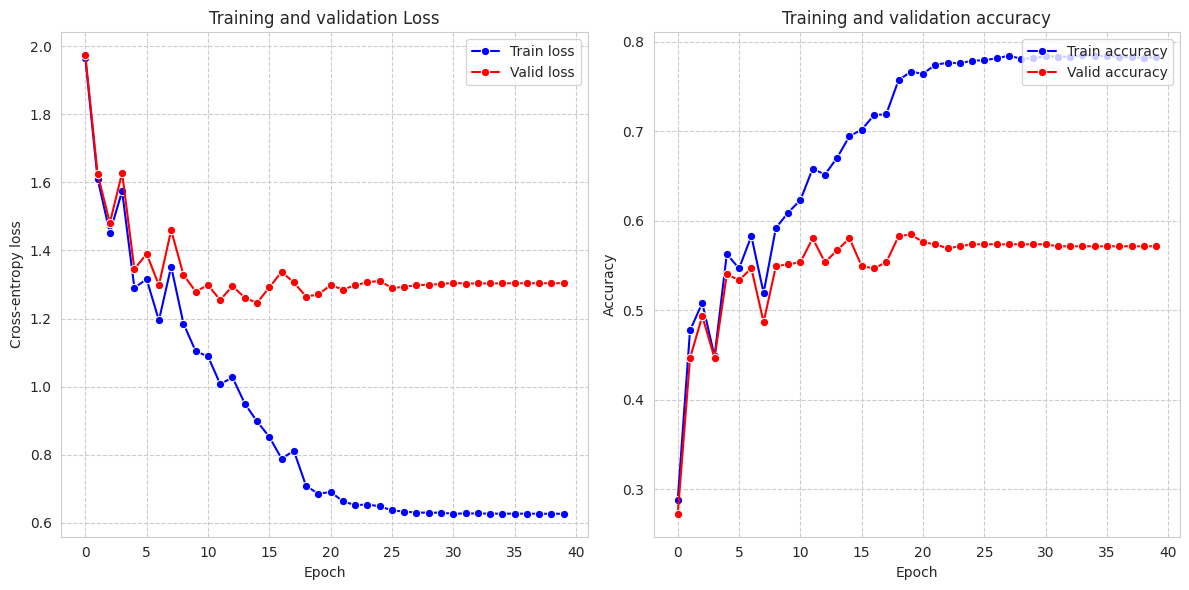

In [7]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [12, 24, 48]
config.dropout_map = [0, 0.1, 0.2]
config.dropout_fc = [0.1, 0.2]

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- With introducing dropouts, the validation accuracy increased from 0.576 (baseline 2) to 0.580.

**Baseline 5:** Increase complexity of the model
- Increase complexity from [12, 24, 48] to [16, 32, 64, 128] with corresponding dropout prob. [0, 0, 0.1, 0.2].
- Added additional convolution layer.

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 7679.97it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.1, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Dropout(p=0.2, inplace=False)
    (14): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Dropout(p=0.1, i

Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.42it/s, batch_loss=1.879237, epoch_loss=2.018050, learning_rate=0.001]



>>> [2024-01-17 15:46:47.174091 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.888823      valid: 1.888048 
    accuracy      - train: 0.301508      valid: 0.296875 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.17it/s, batch_loss=1.701168, epoch_loss=1.823349, learning_rate=0.001]



>>> [2024-01-17 15:46:52.658932 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.680284      valid: 1.695328 
    accuracy      - train: 0.356784      valid: 0.352679 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.49it/s, batch_loss=1.358513, epoch_loss=1.620670, learning_rate=0.001]



>>> [2024-01-17 15:46:59.187562 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.460423      valid: 1.498423 
    accuracy      - train: 0.469570      valid: 0.462054 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.09it/s, batch_loss=1.831484, epoch_loss=1.500859, learning_rate=0.001]



>>> [2024-01-17 15:47:04.999763 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.382423      valid: 1.394465 
    accuracy      - train: 0.494137      valid: 0.491071 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.69it/s, batch_loss=1.653640, epoch_loss=1.386538, learning_rate=0.001]



>>> [2024-01-17 15:47:11.438338 | 5/200 | Early stopping counter 0] 
    loss          - train: 1.307548      valid: 1.360814 
    accuracy      - train: 0.513121      valid: 0.515625 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.30it/s, batch_loss=1.687512, epoch_loss=1.391951, learning_rate=0.001]



>>> [2024-01-17 15:47:17.432262 | 6/200 | Early stopping counter 0] 
    loss          - train: 1.276438      valid: 1.330567 
    accuracy      - train: 0.543830      valid: 0.522321 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.27it/s, batch_loss=1.375819, epoch_loss=1.295865, learning_rate=0.001]



>>> [2024-01-17 15:47:23.387656 | 7/200 | Early stopping counter 0] 
    loss          - train: 1.236905      valid: 1.282149 
    accuracy      - train: 0.553881      valid: 0.546875 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.39it/s, batch_loss=1.422937, epoch_loss=1.287761, learning_rate=0.001]



>>> [2024-01-17 15:47:29.797475 | 8/200 | Early stopping counter 0] 
    loss          - train: 1.151056      valid: 1.236645 
    accuracy      - train: 0.593523      valid: 0.553571 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.21it/s, batch_loss=1.257246, epoch_loss=1.233082, learning_rate=0.001]



>>> [2024-01-17 15:47:35.596352 | 9/200 | Early stopping counter 0] 
    loss          - train: 1.120500      valid: 1.213454 
    accuracy      - train: 0.594082      valid: 0.584821 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 16.94it/s, batch_loss=1.138430, epoch_loss=1.195713, learning_rate=0.001]



>>> [2024-01-17 15:47:42.182484 | 10/200 | Early stopping counter 1] 
    loss          - train: 1.100937      valid: 1.240756 
    accuracy      - train: 0.621441      valid: 0.551339 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.77it/s, batch_loss=1.377883, epoch_loss=1.130030, learning_rate=0.001]



>>> [2024-01-17 15:47:48.081175 | 11/200 | Early stopping counter 2] 
    loss          - train: 1.128216      valid: 1.240495 
    accuracy      - train: 0.619207      valid: 0.546875 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.10it/s, batch_loss=0.874112, epoch_loss=1.172839, learning_rate=0.001]



>>> [2024-01-17 15:47:54.199377 | 12/200 | Early stopping counter 3] 
    loss          - train: 0.984983      valid: 1.219147 
    accuracy      - train: 0.635958      valid: 0.571429 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 15.47it/s, batch_loss=1.119570, epoch_loss=1.087240, learning_rate=0.001]



>>> [2024-01-17 15:48:00.583775 | 13/200 | Early stopping counter 0] 
    loss          - train: 0.916418      valid: 1.189343 
    accuracy      - train: 0.664433      valid: 0.591518 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.06it/s, batch_loss=0.887167, epoch_loss=1.044165, learning_rate=0.001]



>>> [2024-01-17 15:48:06.441371 | 14/200 | Early stopping counter 1] 
    loss          - train: 0.976249      valid: 1.229711 
    accuracy      - train: 0.630374      valid: 0.558036 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 16.15it/s, batch_loss=0.944142, epoch_loss=1.023790, learning_rate=0.001]



>>> [2024-01-17 15:48:13.087248 | 15/200 | Early stopping counter 2] 
    loss          - train: 0.894031      valid: 1.233013 
    accuracy      - train: 0.668900      valid: 0.566964 
    learning rate        : 1.00000e-03



Epoch 16/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.15it/s, batch_loss=1.095292, epoch_loss=0.985522, learning_rate=0.001]



>>> [2024-01-17 15:48:18.901764 | 16/200 | Early stopping counter 3] 
    loss          - train: 0.812362      valid: 1.219038 
    accuracy      - train: 0.707426      valid: 0.578125 
    learning rate        : 1.00000e-03



Epoch 17/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.18it/s, batch_loss=0.961352, epoch_loss=0.954064, learning_rate=0.001]



>>> [2024-01-17 15:48:25.143201 | 17/200 | Early stopping counter 4] 
    loss          - train: 0.865008      valid: 1.219933 
    accuracy      - train: 0.692909      valid: 0.584821 
    learning rate        : 1.00000e-03



Epoch 18/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 16.17it/s, batch_loss=0.828857, epoch_loss=0.908916, learning_rate=0.001]



>>> [2024-01-17 15:48:31.353698 | 18/200 | Early stopping counter 5] 
    loss          - train: 0.784371      valid: 1.405899 
    accuracy      - train: 0.711334      valid: 0.562500 
    learning rate        : 1.00000e-03



Epoch 19/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.15it/s, batch_loss=1.221297, epoch_loss=0.839132, learning_rate=0.001]



>>> [2024-01-17 15:48:37.180305 | 19/200 | Early stopping counter 6] 
    loss          - train: 0.701358      valid: 1.388264 
    accuracy      - train: 0.734785      valid: 0.542411 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 15.62it/s, batch_loss=0.718142, epoch_loss=0.721449, learning_rate=0.0001]



>>> [2024-01-17 15:48:43.839829 | 20/200 | Early stopping counter 0] 
    loss          - train: 0.611553      valid: 1.283420 
    accuracy      - train: 0.779453      valid: 0.593750 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.94it/s, batch_loss=0.597895, epoch_loss=0.679969, learning_rate=0.0001]



>>> [2024-01-17 15:48:49.716208 | 21/200 | Early stopping counter 1] 
    loss          - train: 0.582396      valid: 1.310339 
    accuracy      - train: 0.791736      valid: 0.580357 
    learning rate        : 1.00000e-04



Epoch 22/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.82it/s, batch_loss=0.700453, epoch_loss=0.664750, learning_rate=0.0001]



>>> [2024-01-17 15:48:56.205050 | 22/200 | Early stopping counter 2] 
    loss          - train: 0.564835      valid: 1.325404 
    accuracy      - train: 0.796203      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 23/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.06it/s, batch_loss=0.746012, epoch_loss=0.649260, learning_rate=0.0001]



>>> [2024-01-17 15:49:02.230001 | 23/200 | Early stopping counter 3] 
    loss          - train: 0.551970      valid: 1.352584 
    accuracy      - train: 0.801787      valid: 0.564732 
    learning rate        : 1.00000e-04



Epoch 24/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.90it/s, batch_loss=0.777946, epoch_loss=0.645669, learning_rate=0.0001]



>>> [2024-01-17 15:49:08.595623 | 24/200 | Early stopping counter 4] 
    loss          - train: 0.540244      valid: 1.357169 
    accuracy      - train: 0.800112      valid: 0.580357 
    learning rate        : 1.00000e-04



Epoch 25/200: 100%|█████████████████████████████████████████████| 56/56 [00:04<00:00, 13.75it/s, batch_loss=0.593838, epoch_loss=0.623929, learning_rate=0.0001]



>>> [2024-01-17 15:49:15.990091 | 25/200 | Early stopping counter 5] 
    loss          - train: 0.531108      valid: 1.345042 
    accuracy      - train: 0.806812      valid: 0.582589 
    learning rate        : 1.00000e-04



Epoch 26/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.15it/s, batch_loss=0.532887, epoch_loss=0.614604, learning_rate=0.0001]



>>> [2024-01-17 15:49:21.729010 | 26/200 | Early stopping counter 6] 
    loss          - train: 0.514387      valid: 1.382714 
    accuracy      - train: 0.808487      valid: 0.587054 
    learning rate        : 1.00000e-05



Epoch 27/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.91it/s, batch_loss=0.594117, epoch_loss=0.600832, learning_rate=1e-5]



>>> [2024-01-17 15:49:27.976761 | 27/200 | Early stopping counter 7] 
    loss          - train: 0.512748      valid: 1.383872 
    accuracy      - train: 0.809604      valid: 0.589286 
    learning rate        : 1.00000e-05



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.96it/s, batch_loss=0.505942, epoch_loss=0.597779, learning_rate=1e-5]



>>> [2024-01-17 15:49:34.220304 | 28/200 | Early stopping counter 8] 
    loss          - train: 0.510998      valid: 1.378734 
    accuracy      - train: 0.812395      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.89it/s, batch_loss=0.559701, epoch_loss=0.589250, learning_rate=1e-5]



>>> [2024-01-17 15:49:40.040322 | 29/200 | Early stopping counter 9] 
    loss          - train: 0.509636      valid: 1.378043 
    accuracy      - train: 0.812395      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.79it/s, batch_loss=0.638102, epoch_loss=0.599215, learning_rate=1e-5]



>>> [2024-01-17 15:49:46.775317 | 30/200 | Early stopping counter 10] 
    loss          - train: 0.508708      valid: 1.376490 
    accuracy      - train: 0.812395      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.08it/s, batch_loss=0.865487, epoch_loss=0.592788, learning_rate=1e-5]



>>> [2024-01-17 15:49:52.598094 | 31/200 | Early stopping counter 11] 
    loss          - train: 0.507706      valid: 1.380076 
    accuracy      - train: 0.811837      valid: 0.578125 
    learning rate        : 1.00000e-05



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.88it/s, batch_loss=0.611862, epoch_loss=0.588416, learning_rate=1e-5]



>>> [2024-01-17 15:49:59.332380 | 32/200 | Early stopping counter 12] 
    loss          - train: 0.506466      valid: 1.379047 
    accuracy      - train: 0.814070      valid: 0.580357 
    learning rate        : 1.00000e-06



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:04<00:00, 13.97it/s, batch_loss=0.802923, epoch_loss=0.589112, learning_rate=1e-6]



>>> [2024-01-17 15:50:06.687622 | 33/200 | Early stopping counter 13] 
    loss          - train: 0.506352      valid: 1.379479 
    accuracy      - train: 0.814070      valid: 0.578125 
    learning rate        : 1.00000e-06



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.63it/s, batch_loss=0.678959, epoch_loss=0.597162, learning_rate=1e-6]



>>> [2024-01-17 15:50:14.691426 | 34/200 | Early stopping counter 14] 
    loss          - train: 0.506061      valid: 1.379938 
    accuracy      - train: 0.813512      valid: 0.578125 
    learning rate        : 1.00000e-06



Epoch 35/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.75it/s, batch_loss=0.483284, epoch_loss=0.588376, learning_rate=1e-6]



>>> [2024-01-17 15:50:20.770163 | 35/200 | Early stopping counter 15] 
    loss          - train: 0.506066      valid: 1.380585 
    accuracy      - train: 0.814070      valid: 0.578125 
    learning rate        : 1.00000e-06



Epoch 36/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.95it/s, batch_loss=0.568572, epoch_loss=0.585464, learning_rate=1e-6]



>>> [2024-01-17 15:50:26.762026 | 36/200 | Early stopping counter 16] 
    loss          - train: 0.505907      valid: 1.380817 
    accuracy      - train: 0.814070      valid: 0.578125 
    learning rate        : 1.00000e-06



Epoch 37/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 14.26it/s, batch_loss=0.470310, epoch_loss=0.599691, learning_rate=1e-6]



>>> [2024-01-17 15:50:33.631628 | 37/200 | Early stopping counter 17] 
    loss          - train: 0.505740      valid: 1.380708 
    accuracy      - train: 0.814070      valid: 0.578125 
    learning rate        : 1.00000e-06



Epoch 38/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.21it/s, batch_loss=0.308122, epoch_loss=0.591485, learning_rate=1e-6]



>>> [2024-01-17 15:50:39.416700 | 38/200 | Early stopping counter 18] 
    loss          - train: 0.505800      valid: 1.380635 
    accuracy      - train: 0.814629      valid: 0.578125 
    learning rate        : 1.00000e-07



Epoch 39/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.17it/s, batch_loss=0.708842, epoch_loss=0.600975, learning_rate=1e-7]



>>> [2024-01-17 15:50:45.987696 | 39/200 | Early stopping counter 19] 
    loss          - train: 0.505621      valid: 1.380665 
    accuracy      - train: 0.814070      valid: 0.578125 
    learning rate        : 1.00000e-07



Epoch 40/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.83it/s, batch_loss=0.430597, epoch_loss=0.576955, learning_rate=1e-7]



>>> [2024-01-17 15:50:52.037753 | 40/200 | Early stopping counter 20] 
    loss          - train: 0.505595      valid: 1.380727 
    accuracy      - train: 0.814070      valid: 0.578125 
    learning rate        : 1.00000e-07



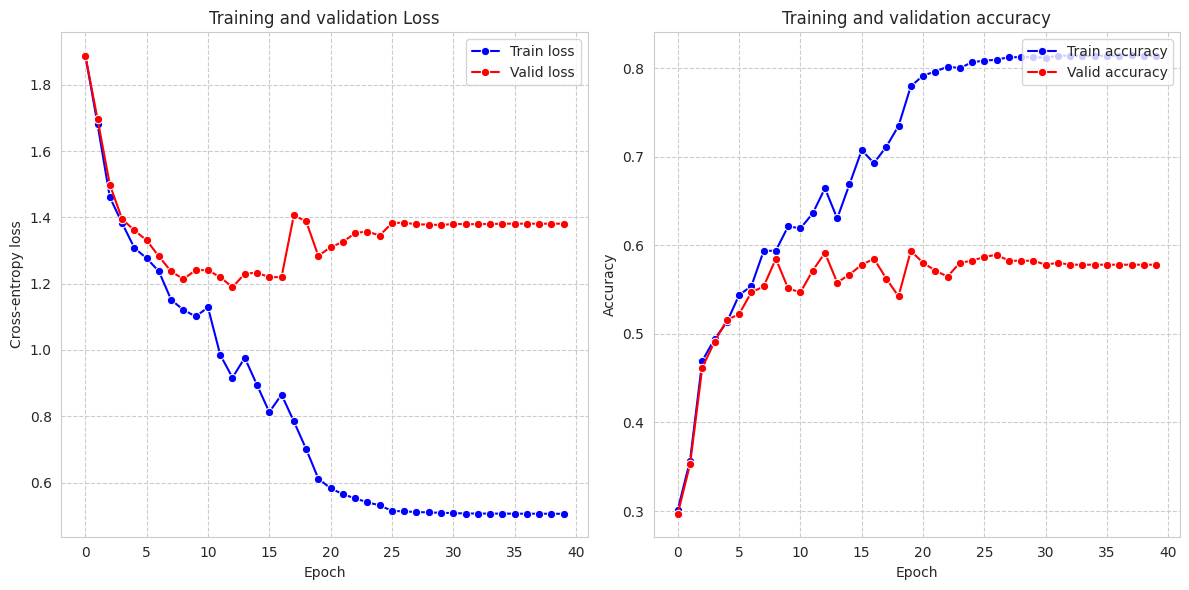

In [8]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [16, 32, 64, 128]
config.dropout_map = [0, 0, 0.1, 0.2]
config.dropout_fc = [0.1, 0.2]

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- With introducing additional convolution layer and increasing units, the validation accuracy increased from 0.580 to 0.594. This is the best model setup among the trials.

### Checklist
**Class distribution**: Examine the current class distribution in the training dataset
- Which class has the least number of samples?
  - seborrheic keratosis
- Which classes dominate the data in terms of the proportionate number of samples?
  - pigmented benign keratosis

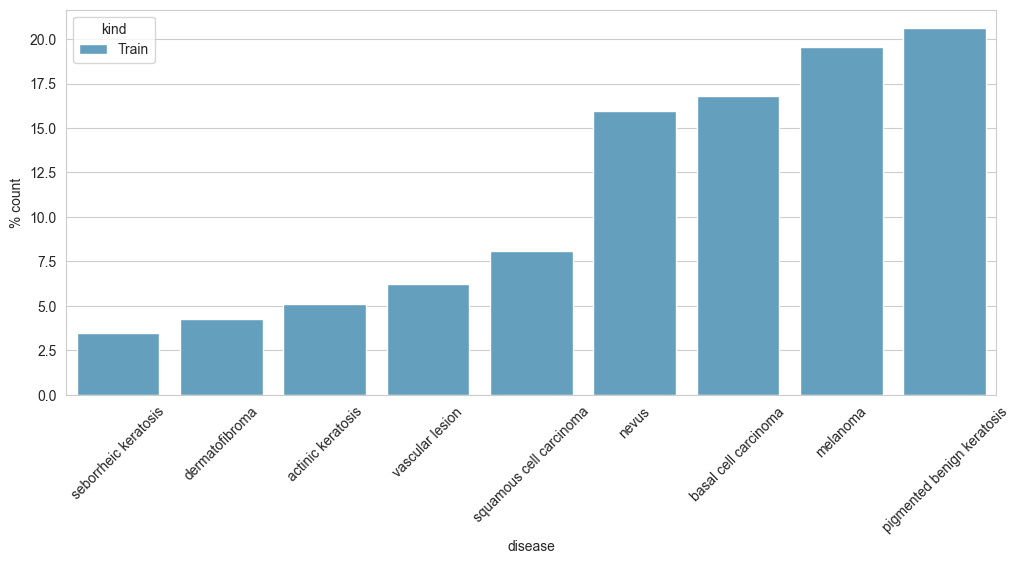

## Training with weighted cross entropy loss
- Introduced class weights of all the 9 labels in cross entropy loss as a part of resolving class imbalance problem.
- Use the same model setup as baseline #5

Current vram: cuda
set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 12005.88it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
Class weights: [0.9448451421298261, 0.8336868901145524, 0.9529062367416207, 0.8073822655918541, 0.841747984726347, 0.797199830292745, 0.9660585490029698, 0.9164191769198133, 0.9397539244802715]
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.1, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kern

Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 14.02it/s, batch_loss=1.901885, epoch_loss=2.040787, learning_rate=0.001]



>>> [2024-01-17 16:23:17.899109 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.901130      valid: 1.877088 
    accuracy      - train: 0.295366      valid: 0.312500 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:05<00:00, 10.10it/s, batch_loss=1.918100, epoch_loss=1.830997, learning_rate=0.001]



>>> [2024-01-17 16:23:26.631943 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.777467      valid: 1.775056 
    accuracy      - train: 0.417644      valid: 0.433036 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.18it/s, batch_loss=1.270920, epoch_loss=1.653305, learning_rate=0.001]



>>> [2024-01-17 16:23:32.773323 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.457683      valid: 1.437895 
    accuracy      - train: 0.509771      valid: 0.502232 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.16it/s, batch_loss=1.773111, epoch_loss=1.537413, learning_rate=0.001]



>>> [2024-01-17 16:23:39.117299 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.405487      valid: 1.405096 
    accuracy      - train: 0.497487      valid: 0.502232 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.13it/s, batch_loss=1.713237, epoch_loss=1.436172, learning_rate=0.001]



>>> [2024-01-17 16:23:44.868101 | 5/200 | Early stopping counter 1] 
    loss          - train: 1.353691      valid: 1.384410 
    accuracy      - train: 0.493021      valid: 0.488839 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.29it/s, batch_loss=1.735248, epoch_loss=1.405670, learning_rate=0.001]



>>> [2024-01-17 16:23:51.466942 | 6/200 | Early stopping counter 0] 
    loss          - train: 1.328751      valid: 1.349793 
    accuracy      - train: 0.534897      valid: 0.515625 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.00it/s, batch_loss=1.510684, epoch_loss=1.318931, learning_rate=0.001]



>>> [2024-01-17 16:23:57.281918 | 7/200 | Early stopping counter 0] 
    loss          - train: 1.286805      valid: 1.338475 
    accuracy      - train: 0.542155      valid: 0.524554 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.89it/s, batch_loss=1.310831, epoch_loss=1.285538, learning_rate=0.001]



>>> [2024-01-17 16:24:03.512152 | 8/200 | Early stopping counter 1] 
    loss          - train: 1.243475      valid: 1.338657 
    accuracy      - train: 0.546622      valid: 0.513393 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.81it/s, batch_loss=1.260231, epoch_loss=1.247500, learning_rate=0.001]



>>> [2024-01-17 16:24:09.769866 | 9/200 | Early stopping counter 0] 
    loss          - train: 1.126903      valid: 1.225556 
    accuracy      - train: 0.598548      valid: 0.573661 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.93it/s, batch_loss=1.120206, epoch_loss=1.207098, learning_rate=0.001]



>>> [2024-01-17 16:24:15.593300 | 10/200 | Early stopping counter 1] 
    loss          - train: 1.086501      valid: 1.229066 
    accuracy      - train: 0.631491      valid: 0.562500 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 15.54it/s, batch_loss=1.263948, epoch_loss=1.189650, learning_rate=0.001]



>>> [2024-01-17 16:24:22.265302 | 11/200 | Early stopping counter 2] 
    loss          - train: 1.094685      valid: 1.263246 
    accuracy      - train: 0.628141      valid: 0.555804 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.00it/s, batch_loss=0.977248, epoch_loss=1.159432, learning_rate=0.001]



>>> [2024-01-17 16:24:28.091794 | 12/200 | Early stopping counter 3] 
    loss          - train: 1.063293      valid: 1.313692 
    accuracy      - train: 0.629257      valid: 0.535714 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.87it/s, batch_loss=1.102512, epoch_loss=1.130639, learning_rate=0.001]



>>> [2024-01-17 16:24:34.697359 | 13/200 | Early stopping counter 4] 
    loss          - train: 0.989893      valid: 1.216192 
    accuracy      - train: 0.655500      valid: 0.549107 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 56/56 [00:04<00:00, 13.75it/s, batch_loss=0.989316, epoch_loss=1.082645, learning_rate=0.001]



>>> [2024-01-17 16:24:42.136672 | 14/200 | Early stopping counter 5] 
    loss          - train: 0.927474      valid: 1.244169 
    accuracy      - train: 0.668342      valid: 0.560268 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 15.41it/s, batch_loss=1.032408, epoch_loss=1.054099, learning_rate=0.001]



>>> [2024-01-17 16:24:49.284626 | 15/200 | Early stopping counter 6] 
    loss          - train: 0.940342      valid: 1.260424 
    accuracy      - train: 0.678392      valid: 0.546875 
    learning rate        : 1.00000e-04



Epoch 16/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 15.85it/s, batch_loss=0.884715, epoch_loss=0.941383, learning_rate=0.0001]



>>> [2024-01-17 16:24:55.529283 | 16/200 | Early stopping counter 0] 
    loss          - train: 0.841688      valid: 1.224634 
    accuracy      - train: 0.710776      valid: 0.578125 
    learning rate        : 1.00000e-04



Epoch 17/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.73it/s, batch_loss=0.854840, epoch_loss=0.880636, learning_rate=0.0001]



>>> [2024-01-17 16:25:01.340910 | 17/200 | Early stopping counter 1] 
    loss          - train: 0.807653      valid: 1.251095 
    accuracy      - train: 0.725851      valid: 0.575893 
    learning rate        : 1.00000e-04



Epoch 18/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 15.61it/s, batch_loss=0.735027, epoch_loss=0.872241, learning_rate=0.0001]



>>> [2024-01-17 16:25:08.028155 | 18/200 | Early stopping counter 0] 
    loss          - train: 0.787125      valid: 1.250737 
    accuracy      - train: 0.726968      valid: 0.578125 
    learning rate        : 1.00000e-04



Epoch 19/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.94it/s, batch_loss=1.203530, epoch_loss=0.857999, learning_rate=0.0001]



>>> [2024-01-17 16:25:13.891877 | 19/200 | Early stopping counter 1] 
    loss          - train: 0.768288      valid: 1.263245 
    accuracy      - train: 0.734785      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.18it/s, batch_loss=0.930351, epoch_loss=0.839159, learning_rate=0.0001]



>>> [2024-01-17 16:25:20.176556 | 20/200 | Early stopping counter 0] 
    loss          - train: 0.761561      valid: 1.259341 
    accuracy      - train: 0.736460      valid: 0.593750 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 16.62it/s, batch_loss=0.790279, epoch_loss=0.829947, learning_rate=0.0001]



>>> [2024-01-17 16:25:26.226058 | 21/200 | Early stopping counter 1] 
    loss          - train: 0.743115      valid: 1.278075 
    accuracy      - train: 0.744835      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 22/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.09it/s, batch_loss=0.775393, epoch_loss=0.825008, learning_rate=0.0001]



>>> [2024-01-17 16:25:31.985377 | 22/200 | Early stopping counter 2] 
    loss          - train: 0.735084      valid: 1.277175 
    accuracy      - train: 0.744277      valid: 0.580357 
    learning rate        : 1.00000e-04



Epoch 23/200: 100%|█████████████████████████████████████████████| 56/56 [00:04<00:00, 13.40it/s, batch_loss=1.205463, epoch_loss=0.825053, learning_rate=0.0001]



>>> [2024-01-17 16:25:39.081416 | 23/200 | Early stopping counter 3] 
    loss          - train: 0.724281      valid: 1.278403 
    accuracy      - train: 0.750419      valid: 0.580357 
    learning rate        : 1.00000e-04



Epoch 24/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.83it/s, batch_loss=1.069724, epoch_loss=0.806009, learning_rate=0.0001]



>>> [2024-01-17 16:25:44.983454 | 24/200 | Early stopping counter 4] 
    loss          - train: 0.715857      valid: 1.300460 
    accuracy      - train: 0.750977      valid: 0.573661 
    learning rate        : 1.00000e-04



Epoch 25/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 14.68it/s, batch_loss=0.926586, epoch_loss=0.790487, learning_rate=0.0001]



>>> [2024-01-17 16:25:52.094241 | 25/200 | Early stopping counter 5] 
    loss          - train: 0.706685      valid: 1.279422 
    accuracy      - train: 0.757119      valid: 0.578125 
    learning rate        : 1.00000e-04



Epoch 26/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 16.19it/s, batch_loss=0.602144, epoch_loss=0.779022, learning_rate=0.0001]



>>> [2024-01-17 16:25:58.242664 | 26/200 | Early stopping counter 6] 
    loss          - train: 0.703266      valid: 1.298803 
    accuracy      - train: 0.759352      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 27/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.84it/s, batch_loss=0.713392, epoch_loss=0.772672, learning_rate=1e-5]



>>> [2024-01-17 16:26:04.974292 | 27/200 | Early stopping counter 7] 
    loss          - train: 0.687088      valid: 1.296631 
    accuracy      - train: 0.762144      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:04<00:00, 12.24it/s, batch_loss=0.826111, epoch_loss=0.755156, learning_rate=1e-5]



>>> [2024-01-17 16:26:13.016715 | 28/200 | Early stopping counter 8] 
    loss          - train: 0.685672      valid: 1.295622 
    accuracy      - train: 0.762702      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 14.29it/s, batch_loss=0.842166, epoch_loss=0.748091, learning_rate=1e-5]



>>> [2024-01-17 16:26:20.492310 | 29/200 | Early stopping counter 9] 
    loss          - train: 0.684158      valid: 1.297093 
    accuracy      - train: 0.762702      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:05<00:00, 10.15it/s, batch_loss=0.938100, epoch_loss=0.763342, learning_rate=1e-5]



>>> [2024-01-17 16:26:29.709126 | 30/200 | Early stopping counter 10] 
    loss          - train: 0.683879      valid: 1.293182 
    accuracy      - train: 0.763261      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 14.80it/s, batch_loss=0.953902, epoch_loss=0.751933, learning_rate=1e-5]



>>> [2024-01-17 16:26:36.630308 | 31/200 | Early stopping counter 11] 
    loss          - train: 0.682651      valid: 1.297080 
    accuracy      - train: 0.760469      valid: 0.584821 
    learning rate        : 1.00000e-05



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:04<00:00, 12.15it/s, batch_loss=0.866532, epoch_loss=0.760408, learning_rate=1e-5]



>>> [2024-01-17 16:26:44.302017 | 32/200 | Early stopping counter 12] 
    loss          - train: 0.681196      valid: 1.295611 
    accuracy      - train: 0.762702      valid: 0.584821 
    learning rate        : 1.00000e-06



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.42it/s, batch_loss=0.929547, epoch_loss=0.752125, learning_rate=1e-6]



>>> [2024-01-17 16:26:50.606726 | 33/200 | Early stopping counter 13] 
    loss          - train: 0.681665      valid: 1.296002 
    accuracy      - train: 0.762702      valid: 0.584821 
    learning rate        : 1.00000e-06



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.50it/s, batch_loss=0.783823, epoch_loss=0.762523, learning_rate=1e-6]



>>> [2024-01-17 16:26:57.180987 | 34/200 | Early stopping counter 14] 
    loss          - train: 0.681173      valid: 1.296526 
    accuracy      - train: 0.762144      valid: 0.584821 
    learning rate        : 1.00000e-06



Epoch 35/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.07it/s, batch_loss=0.689296, epoch_loss=0.747124, learning_rate=1e-6]



>>> [2024-01-17 16:27:02.960694 | 35/200 | Early stopping counter 15] 
    loss          - train: 0.680345      valid: 1.296845 
    accuracy      - train: 0.763261      valid: 0.584821 
    learning rate        : 1.00000e-06



Epoch 36/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.75it/s, batch_loss=0.623217, epoch_loss=0.751880, learning_rate=1e-6]



>>> [2024-01-17 16:27:09.120965 | 36/200 | Early stopping counter 16] 
    loss          - train: 0.680777      valid: 1.296858 
    accuracy      - train: 0.763261      valid: 0.584821 
    learning rate        : 1.00000e-06



Epoch 37/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.71it/s, batch_loss=0.599409, epoch_loss=0.752030, learning_rate=1e-6]



>>> [2024-01-17 16:27:15.362596 | 37/200 | Early stopping counter 17] 
    loss          - train: 0.680521      valid: 1.297111 
    accuracy      - train: 0.763819      valid: 0.584821 
    learning rate        : 1.00000e-06



Epoch 38/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.94it/s, batch_loss=0.603643, epoch_loss=0.762334, learning_rate=1e-6]



>>> [2024-01-17 16:27:21.142573 | 38/200 | Early stopping counter 18] 
    loss          - train: 0.680777      valid: 1.296852 
    accuracy      - train: 0.764377      valid: 0.582589 
    learning rate        : 1.00000e-07



Epoch 39/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.22it/s, batch_loss=0.850346, epoch_loss=0.742057, learning_rate=1e-7]



>>> [2024-01-17 16:27:27.821387 | 39/200 | Early stopping counter 19] 
    loss          - train: 0.680505      valid: 1.296885 
    accuracy      - train: 0.764377      valid: 0.582589 
    learning rate        : 1.00000e-07



Epoch 40/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.95it/s, batch_loss=0.782192, epoch_loss=0.740817, learning_rate=1e-7]



>>> [2024-01-17 16:27:34.122415 | 40/200 | Early stopping counter 20] 
    loss          - train: 0.680528      valid: 1.296855 
    accuracy      - train: 0.764377      valid: 0.582589 
    learning rate        : 1.00000e-07



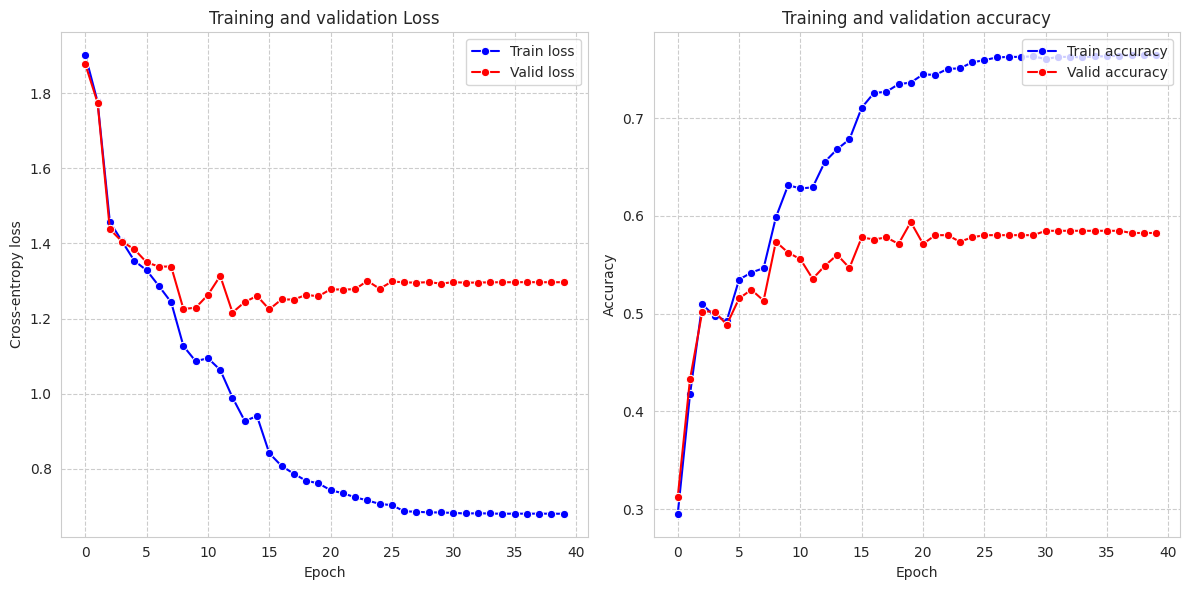

In [4]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [16, 32, 64, 128]
config.dropout_map = [0, 0, 0.1, 0.2]
config.dropout_fc = [0.1, 0.2]
config.use_class_weights = True

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation**:
- Training the model with weighted cross-entropy loss increased the validation accuracy slightly to 0.594.
- Using weighted CE won't affect the model performance much.

## Model with data augmentation

Augmented samples are saved locally to avoid creating them again
```
# Code used for augmenting train images
p = Augmentor.Pipeline(datapath, output_directory = output_dir)
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.25)
p.random_distortion()
p.sample(config.aug_size)
p.process()
```



**Augmented 1:**
- Use the same model setup as baseline #5
- For each label, created 500 augmented images. Still the label are imbalanced, but before the model have more sample to train then it might affect the performance much.
- Also using class weights in cross-entropy loss

In [4]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'augmentxconvnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [16, 32, 64, 128]
config.dropout_map = [0, 0, 0.1, 0.2]
config.dropout_fc = [0.1, 0.2]
config.use_class_weights = True

# Data augmentation
config.aug_dir = '/content/aug_data'
config.aug_size = 100       # additional samples per label

# fold
config.fold = 4

_ = train(config = config)

Current vram: cuda
set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 8057.61it/s]


Initialised with 91 image(s) found.
Output directory set to /content/aug_data/actinic keratosis.

TypeError: Pipeline.random_distortion() missing 4 required positional arguments: 'probability', 'grid_width', 'grid_height', and 'magnitude'

**Performance Evaluation**:
- Training the model with additional 500 augmented images for each label increased the validation accuracy marginally to 0.595.

## END